In [13]:

from keras.datasets import mnist 
import matplotlib.pyplot as plt 
import numpy
from keras.models import Sequential
from keras.layers import *

from keras.utils import np_utils
from keras.callbacks import *
from keras import backend as K

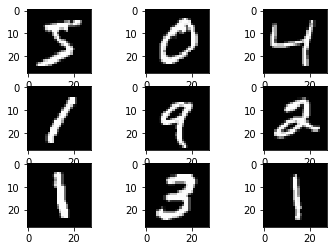

In [14]:
K.set_image_data_format('channels_first')
# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

for i in range(0, 9): 
    plt.subplot(330 + 1 + i) 
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    # show the plot
plt.show()


In [15]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [16]:
# create model
digit_recognition = Sequential()
digit_recognition.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
digit_recognition.add(MaxPooling2D(pool_size=(2, 2)))
digit_recognition.add(Conv2D(15, (3, 3), activation='relu'))
digit_recognition.add(MaxPooling2D(pool_size=(2, 2)))
digit_recognition.add(Dropout(0.2))
digit_recognition.add(Flatten())
digit_recognition.add(Dense(128, activation='relu'))
digit_recognition.add(Dense(50, activation='relu'))
digit_recognition.add(Dense(num_classes, activation='softmax'))

In [17]:
# Compile model
digit_recognition.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [18]:
# build the model
earl = EarlyStopping(monitor='val_loss', min_delta=1e-8, patience=50, verbose=1, mode='auto')
weights_path='/home/ahmed/Downloads/aihack/code/weights/first_try.h5'
modelcheck = ModelCheckpoint(weights_path, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
reducecall = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, verbose=1, mode='auto', min_delta=1e-30, min_lr=1e-30)

In [19]:
# Fit the model
digit_recognition.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=200,
                      verbose=1,callbacks=[modelcheck,reducecall, earl])
digit_recognition.load_weights(weights_path)


Train on 60000 samples, validate on 10000 samples
Epoch 1/1000
60000/60000 [==============================] - 15s 255us/step - loss: 0.3856 - accuracy: 0.8818 - val_loss: 0.0781 - val_accuracy: 0.9756

Epoch 00001: val_loss improved from inf to 0.07810, saving model to /home/ahmed/Downloads/aihack/code/weights/first_try.h5
Epoch 2/1000
60000/60000 [==============================] - 14s 236us/step - loss: 0.0931 - accuracy: 0.9709 - val_loss: 0.0481 - val_accuracy: 0.9856

Epoch 00002: val_loss improved from 0.07810 to 0.04806, saving model to /home/ahmed/Downloads/aihack/code/weights/first_try.h5
Epoch 3/1000
60000/60000 [==============================] - 14s 241us/step - loss: 0.0690 - accuracy: 0.9787 - val_loss: 0.0397 - val_accuracy: 0.9874

Epoch 00003: val_loss improved from 0.04806 to 0.03971, saving model to /home/ahmed/Downloads/aihack/code/weights/first_try.h5
Epoch 4/1000
60000/60000 [==============================] - 15s 258us/step - loss: 0.0539 - accuracy: 0.9837 - val_l

KeyboardInterrupt: 

Baseline Error: 0.83%


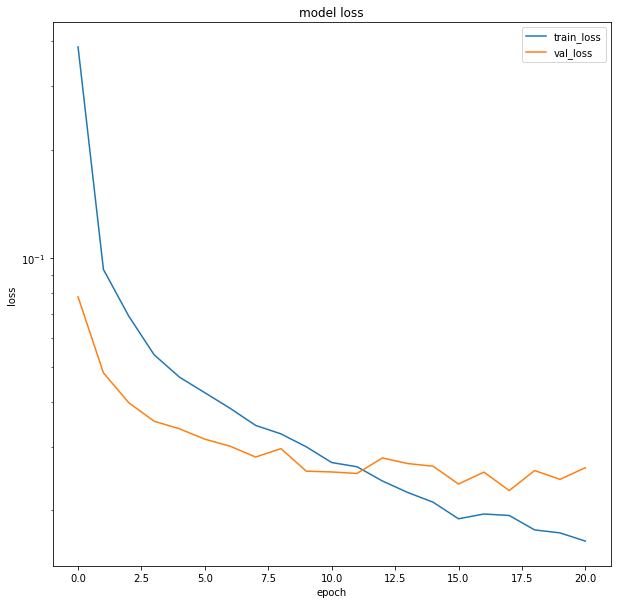

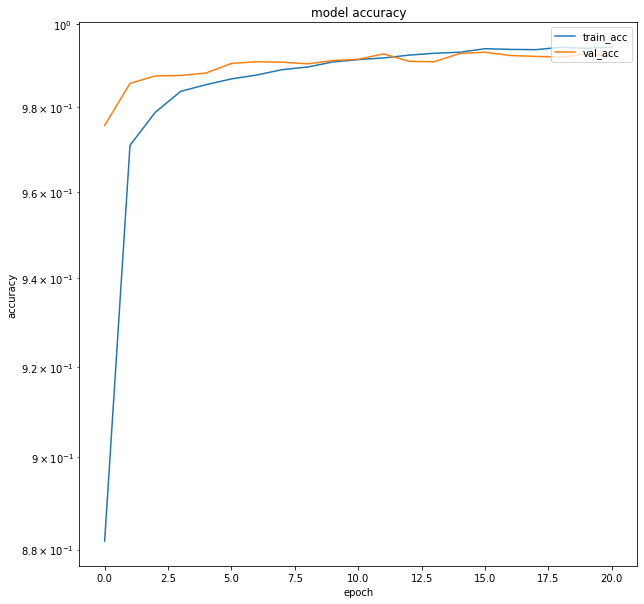

In [21]:
#model_path='/home/ahmed/Downloads/aihack/code/weights/first_try_model.h5'
#digit_recognition.save(model_path)
# Model Performance
plt.figure(figsize=(10, 10))
plt.semilogy(digit_recognition.history.history['loss'])
plt.semilogy(digit_recognition.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper right');

plt.figure(figsize=(10, 10))
plt.semilogy(digit_recognition.history.history['accuracy'])
plt.semilogy(digit_recognition.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper right');
# Final evaluation of the model
scores = digit_recognition.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
